<a href="https://colab.research.google.com/github/Saimon0007/Clustering-Datasets/blob/main/Clustered_Bank_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-means Clusterng**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
url ='https://raw.githubusercontent.com/muajnstu/Large_Scale_Implementation_of_DSK_Chain/refs/heads/main/Cleaned_Data/bank_processed.csv'
df = pd.read_csv(url)

X = df.drop(columns=['deposit'])
y = df['deposit']

X_0 = X[y == 0]
X_1 = X[y == 1]

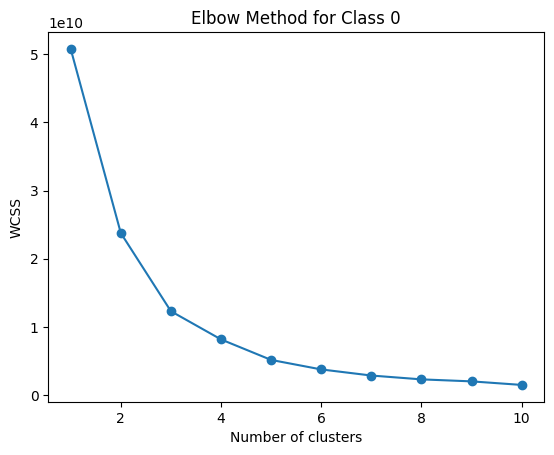

In [ ]:
wcss_0 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_0)
    wcss_0.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_0, marker='o')
plt.title('Elbow Method for Class 0')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

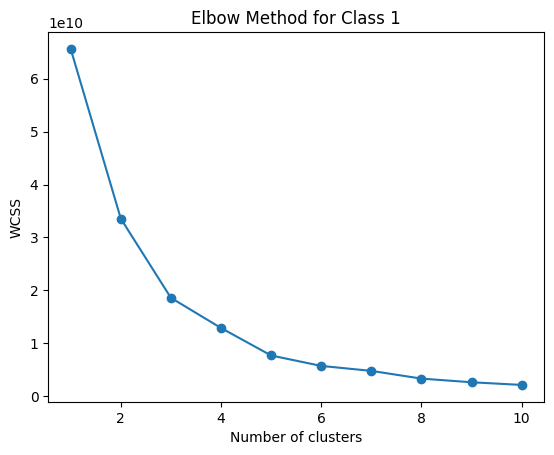

In [ ]:
wcss_1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_1)
    wcss_1.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_1, marker='o')
plt.title('Elbow Method for Class 1')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
n_clusters_0 = 3   # <-- set based on elbow visualization
n_clusters_1 = 3   # <-- set based on elbow visualization

kmeans_0 = KMeans(n_clusters=n_clusters_0, random_state=42)
sub_labels_0 = kmeans_0.fit_predict(X_0)

kmeans_1 = KMeans(n_clusters=n_clusters_1, random_state=42)
sub_labels_1 = kmeans_1.fit_predict(X_1)

In [ ]:
counts_0 = np.bincount(sub_labels_0)
for i, count in enumerate(counts_0):
    print(f"Class 0 - Cluster {i}: {count} samples")

Class 0 - Cluster 0: 5289 samples
Class 0 - Cluster 1: 545 samples
Class 0 - Cluster 2: 39 samples


In [ ]:
counts_1 = np.bincount(sub_labels_1)
for i, count in enumerate(counts_1):
    print(f"Class 1 - Cluster {i}: {count} samples")

Class 1 - Cluster 0: 580 samples
Class 1 - Cluster 1: 4680 samples
Class 1 - Cluster 2: 29 samples


In [ ]:
df_0 = X_0.copy()
df_0['deposit'] = 0
df_0['Cluster_Label'] = sub_labels_0

df_1 = X_1.copy()
df_1['deposit'] = 1
df_1['Cluster_Label'] = sub_labels_1

# Combine both datasets
final_df = pd.concat([df_0, df_1], ignore_index=True)

# Create unique cluster identifiers (combine class + subcluster)
final_df['Combined_Cluster'] = final_df['deposit'].astype(str) + '_' + final_df['Cluster_Label'].astype(str)

# Map to continuous cluster numbers starting from 0
unique_clusters = sorted(final_df['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Assign new continuous labels
final_df['Cluster_Label'] = final_df['Combined_Cluster'].map(cluster_map)

# Drop helper columns (keep only desired ones)
final_df = final_df.drop(columns=['deposit', 'Combined_Cluster'])

# Save to CSV
final_df.to_csv('Clustered_Bank_Data.csv', index=False)

DBSCAN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN

In [ ]:
dbscan_0 = DBSCAN(eps=0.5, min_samples=5)
sub_labels_0 = dbscan_0.fit_predict(X_0)

dbscan_1 = DBSCAN(eps=0.5, min_samples=5)
sub_labels_1 = dbscan_1.fit_predict(X_1)

In [ ]:
unique_0, counts_0 = np.unique(sub_labels_0, return_counts=True)
for cluster, count in zip(unique_0, counts_0):
    print(f"Class 0 - Cluster {cluster}: {count} samples")

Class 0 - Cluster -1: 5873 samples


In [ ]:
unique_1, counts_1 = np.unique(sub_labels_1, return_counts=True)
for cluster, count in zip(unique_1, counts_1):
    print(f"Class 1 - Cluster {cluster}: {count} samples")

Class 1 - Cluster -1: 5289 samples


In [ ]:
df_0 = X_0.copy()
df_0['deposit'] = 0
df_0['Cluster_Label'] = sub_labels_0

df_1 = X_1.copy()
df_1['deposit'] = 1
df_1['Cluster_Label'] = sub_labels_1

# Combine both datasets
final_df = pd.concat([df_0, df_1], ignore_index=True)

# Create unique cluster identifiers (combine class + subcluster)
final_df['Combined_Cluster'] = final_df['deposit'].astype(str) + '_' + final_df['Cluster_Label'].astype(str)

# Map to continuous cluster numbers starting from 0
unique_clusters = sorted(final_df['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Assign new continuous labels
final_df['Cluster_Label'] = final_df['Combined_Cluster'].map(cluster_map)

# Drop helper columns (keep only desired ones)
final_df = final_df.drop(columns=['deposit', 'Combined_Cluster'])

# Save to CSV
final_df.to_csv('Clustered_Bank_Data.csv', index=False)

Hierarchical Clustering (also called Agglomerative Clustering)

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

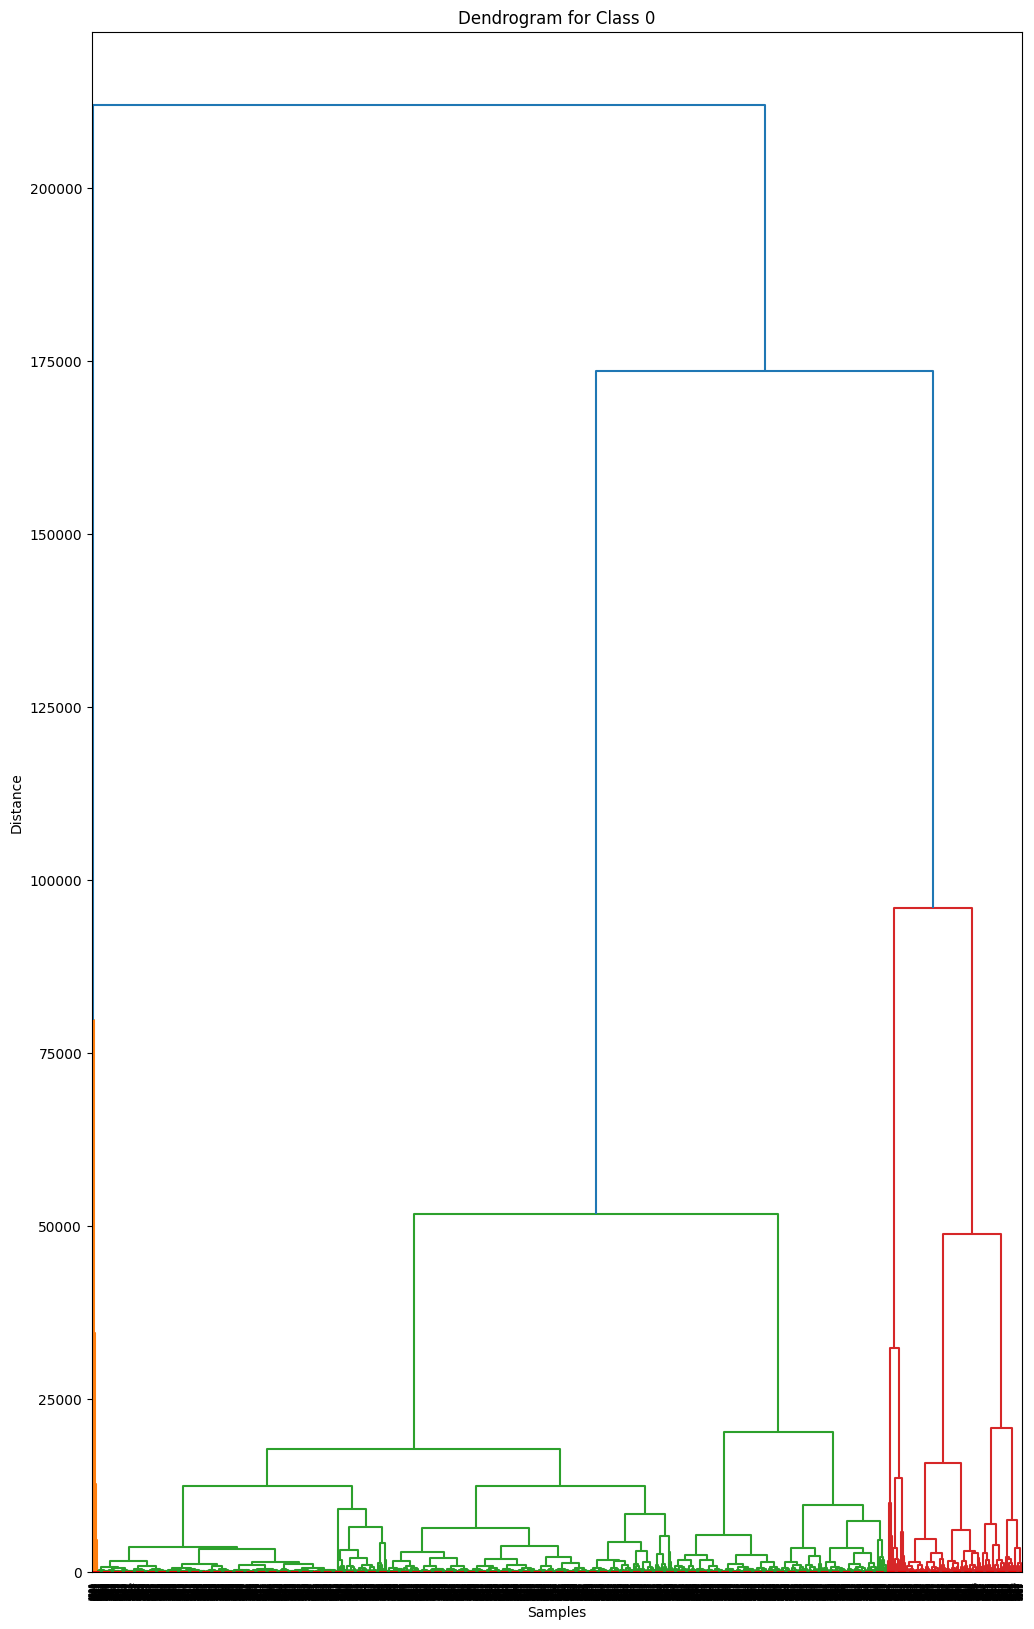

In [ ]:
# Generate linkage matrix for Class 0
Z = linkage(X_0, method='ward')

plt.figure(figsize=(12, 20))  # Increased figure height for better visibility
dendrogram(Z)
plt.title("Dendrogram for Class 0")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.axhline(y=5, color='r', linestyle='--')
plt.show()

In [ ]:
Z = linkage(X_0, method='ward')

cluster_labels = fcluster(Z, t=10000, criterion='distance')

n_clusters = len(np.unique(cluster_labels))
print(f"Number of clusters: {n_clusters}")

Number of clusters: 18


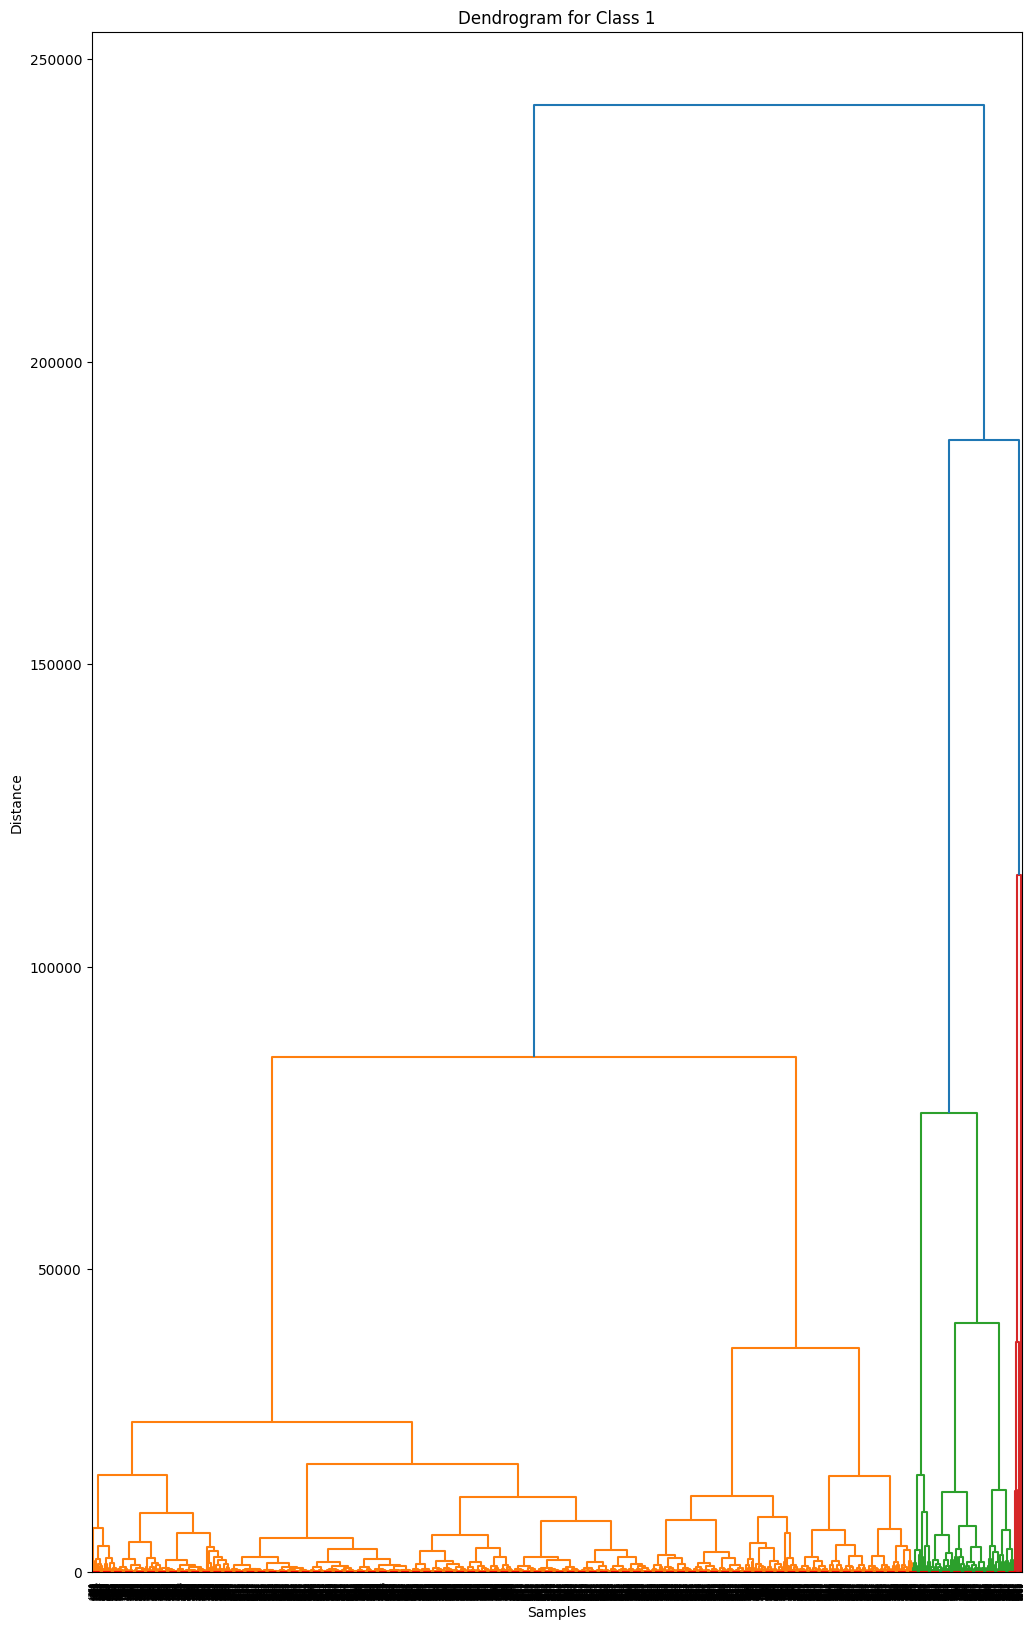

In [ ]:
# Generate linkage matrix for Class 1
Z = linkage(X_1, method='ward')

plt.figure(figsize=(12, 20))  # Increased figure height for better visibility
dendrogram(Z)
plt.title("Dendrogram for Class 1")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.axhline(y=5, color='r', linestyle='--')
plt.show()

In [ ]:
Z = linkage(X_1, method='ward')

cluster_labels = fcluster(Z, t=10000, criterion='distance')

n_clusters = len(np.unique(cluster_labels))
print(f"Number of clusters: {n_clusters}")

Number of clusters: 21


**or**

In [ ]:
hc_0 = AgglomerativeClustering(n_clusters=2, linkage='ward')
sub_labels_0 = hc_0.fit_predict(X_0)

hc_1 = AgglomerativeClustering(n_clusters=2, linkage='ward')
sub_labels_1 = hc_1.fit_predict(X_1)

In [ ]:
counts_0 = np.bincount(sub_labels_0)
for i, count in enumerate(counts_0):
    print(f"Class 0 - Cluster {i}: {count} samples")

counts_1 = np.bincount(sub_labels_1)
for i, count in enumerate(counts_1):
    print(f"Class 1 - Cluster {i}: {count} samples")

Class 0 - Cluster 0: 5840 samples
Class 0 - Cluster 1: 33 samples
Class 1 - Cluster 0: 618 samples
Class 1 - Cluster 1: 4671 samples


In [ ]:
df_0 = X_0.copy()
df_0['deposit'] = 0
df_0['Cluster_Label'] = sub_labels_0

df_1 = X_1.copy()
df_1['deposit'] = 1
df_1['Cluster_Label'] = sub_labels_1

# Combine both datasets
final_df = pd.concat([df_0, df_1], ignore_index=True)

# Create unique cluster identifiers (combine class + subcluster)
final_df['Combined_Cluster'] = final_df['deposit'].astype(str) + '_' + final_df['Cluster_Label'].astype(str)

# Map to continuous cluster numbers starting from 0
unique_clusters = sorted(final_df['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Assign new continuous labels
final_df['Cluster_Label'] = final_df['Combined_Cluster'].map(cluster_map)

# Drop helper columns (keep only desired ones)
final_df = final_df.drop(columns=['deposit', 'Combined_Cluster'])

# Save to CSV
final_df.to_csv('Clustered_Bank_Data.csv', index=False)

**Spectral Clustering**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

In [ ]:
def run_spectral_clustering(X_data, class_label):
    best_score = -1
    best_k = None
    best_labels = None

    # Search for the best number of clusters
    for k in range(2, 7):
        sc = SpectralClustering(
            n_clusters=k,
            affinity='nearest_neighbors',  # or 'rbf'
            assign_labels='kmeans',
            random_state=42
        )
        labels = sc.fit_predict(X_data)
        score = silhouette_score(X_data, labels)
        print(f"Class {class_label} | n_clusters={k}, Silhouette Score={score:.4f}")

        if score > best_score:
            best_score = score
            best_k = k
            best_labels = labels

    print(f"Best n_clusters for Class {class_label}: {best_k} (Silhouette Score={best_score:.4f})")
    return best_labels, best_k, best_score

In [ ]:
# ---- Run Spectral Clustering with automatic k selection ----
sub_labels_0, best_k_0, best_score_0 = run_spectral_clustering(X_0, class_label=0)
sub_labels_1, best_k_1, best_score_1 = run_spectral_clustering(X_1, class_label=1)

Class 0 | n_clusters=2, Silhouette Score=0.7543
Class 0 | n_clusters=3, Silhouette Score=0.5477
Class 0 | n_clusters=4, Silhouette Score=0.4753
Class 0 | n_clusters=5, Silhouette Score=0.4311
Class 0 | n_clusters=6, Silhouette Score=0.3624
Best n_clusters for Class 0: 2 (Silhouette Score=0.7543)
Class 1 | n_clusters=2, Silhouette Score=0.6572
Class 1 | n_clusters=3, Silhouette Score=0.5600
Class 1 | n_clusters=4, Silhouette Score=0.4739
Class 1 | n_clusters=5, Silhouette Score=0.4003
Class 1 | n_clusters=6, Silhouette Score=0.3476
Best n_clusters for Class 1: 2 (Silhouette Score=0.6572)


In [ ]:
# Show cluster counts
counts_0 = np.bincount(sub_labels_0)
for i, count in enumerate(counts_0):
    print(f"Class 0 - Cluster {i}: {count} samples")

counts_1 = np.bincount(sub_labels_1)
for i, count in enumerate(counts_1):
    print(f"Class 1 - Cluster {i}: {count} samples")

Class 0 - Cluster 0: 5057 samples
Class 0 - Cluster 1: 816 samples
Class 1 - Cluster 0: 4136 samples
Class 1 - Cluster 1: 1153 samples


In [ ]:
df_0 = X_0.copy()
df_0['deposit'] = 0
df_0['Cluster_Label'] = sub_labels_0

df_1 = X_1.copy()
df_1['deposit'] = 1
df_1['Cluster_Label'] = sub_labels_1

# Combine both datasets
final_df = pd.concat([df_0, df_1], ignore_index=True)

# Create unique cluster identifiers (combine class + subcluster)
final_df['Combined_Cluster'] = final_df['deposit'].astype(str) + '_' + final_df['Cluster_Label'].astype(str)

# Map to continuous cluster numbers starting from 0
unique_clusters = sorted(final_df['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Assign new continuous labels
final_df['Cluster_Label'] = final_df['Combined_Cluster'].map(cluster_map)

# Drop helper columns (keep only desired ones)
final_df = final_df.drop(columns=['deposit', 'Combined_Cluster'])

# Save to CSV
final_df.to_csv('Clustered_Bank_Data.csv', index=False)

Min batch k-means

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans

In [ ]:
n_clusters_0 = 3
mbk_0 = MiniBatchKMeans(
    n_clusters=n_clusters_0,
    random_state=42,
    batch_size=256,
    max_iter=100
)
sub_labels_0 = mbk_0.fit_predict(X_0)

n_clusters_1 = 3
mbk_1 = MiniBatchKMeans(
    n_clusters=n_clusters_1,
    random_state=42,
    batch_size=256,
    max_iter=100
)
sub_labels_1 = mbk_1.fit_predict(X_1)

In [ ]:
counts_0 = np.bincount(sub_labels_0)
for i, count in enumerate(counts_0):
    print(f"Class 0 - Cluster {i}: {count} samples")

counts_1 = np.bincount(sub_labels_1)
for i, count in enumerate(counts_1):
    print(f"Class 1 - Cluster {i}: {count} samples")

Class 0 - Cluster 0: 1611 samples
Class 0 - Cluster 1: 4024 samples
Class 0 - Cluster 2: 238 samples
Class 1 - Cluster 0: 4323 samples
Class 1 - Cluster 1: 40 samples
Class 1 - Cluster 2: 926 samples


In [ ]:
df_0 = X_0.copy()
df_0['deposit'] = 0
df_0['Cluster_Label'] = sub_labels_0

df_1 = X_1.copy()
df_1['deposit'] = 1
df_1['Cluster_Label'] = sub_labels_1

# Combine both datasets
final_df = pd.concat([df_0, df_1], ignore_index=True)

# Create unique cluster identifiers (combine class + subcluster)
final_df['Combined_Cluster'] = final_df['deposit'].astype(str) + '_' + final_df['Cluster_Label'].astype(str)

# Map to continuous cluster numbers starting from 0
unique_clusters = sorted(final_df['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Assign new continuous labels
final_df['Cluster_Label'] = final_df['Combined_Cluster'].map(cluster_map)

# Drop helper columns (keep only desired ones)
final_df = final_df.drop(columns=['deposit', 'Combined_Cluster'])

# Save to CSV
final_df.to_csv('Clustered_Bank_Data.csv', index=False)

In [ ]:
import numpy as np
import pandas as pd
from math import ceil
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Reconstruct the df with 'deposit' and 'Cluster_Label' from the previous MiniBatchKMeans step
# Assuming sub_labels_0, sub_labels_1, X_0, X_1 are available from the previous cells

_df_0_temp = X_0.copy()
_df_0_temp['deposit'] = 0
_df_0_temp['Cluster_Label'] = sub_labels_0

_df_1_temp = X_1.copy()
_df_1_temp['deposit'] = 1
_df_1_temp['Cluster_Label'] = sub_labels_1

# Combine both datasets for re-clustering
df = pd.concat([_df_0_temp, _df_1_temp], ignore_index=True)

# Create unique cluster identifiers (combine class + subcluster)
df['Combined_Cluster'] = df['deposit'].astype(str) + '_' + df['Cluster_Label'].astype(str)

# Map to continuous cluster numbers starting from 0
unique_clusters = sorted(df['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Assign new continuous labels
df['Cluster_Label'] = df['Combined_Cluster'].map(cluster_map)

# Remove Combined_Cluster as it's a helper column
df = df.drop(columns=['Combined_Cluster'])

# Clean up temp variables
del _df_0_temp, _df_1_temp

# Adjust feature_cols to reflect the actual columns in `df` and exclude 'deposit'
feature_cols = [c for c in df.columns if c not in ['deposit', 'Cluster_Label']]

df_balanced = df.copy()
offset = df['Cluster_Label'].max() + 1
target_cluster_size = 2000  # aim for clusters around this size

for cls in df_balanced['deposit'].unique():
    mask = df_balanced['deposit'] == cls
    subset = df_balanced.loc[mask, feature_cols]
    total = subset.shape[0]

    # estimate number of clusters based on target size
    n_clusters = max(2, ceil(total / target_cluster_size))
    print(f"\nReclustering class {cls}: {total} samples into {n_clusters} new clusters")

    # scale and cluster
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(subset)
    re_kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=512)
    new_labels = re_kmeans.fit_predict(X_scaled)

    # optional silhouette (diagnostic)
    if total > 50:
        sample_size = min(2000, total)
        sil = silhouette_score(X_scaled[:sample_size], new_labels[:sample_size])
        print(f"  Silhouette score: {sil:.4f}")

    # assign new global cluster labels
    df_balanced.loc[mask, 'Cluster_Label'] = new_labels + offset
    offset += n_clusters

# show final distribution
print("\n✅ New cluster distribution:")
print(df_balanced.groupby(['deposit', 'Cluster_Label']).size())


Reclustering class 0: 5873 samples into 3 new clusters
  Silhouette score: 0.1311

Reclustering class 1: 5289 samples into 3 new clusters
  Silhouette score: 0.0755

✅ New cluster distribution:
deposit  Cluster_Label
0        6                1627
         7                1358
         8                2888
1        9                1140
         10               1065
         11               3084
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from math import ceil
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

# --- Start: Reconstruct df_balanced state from previous clustering steps ---
# These variables (X_0, X_1, sub_labels_0, sub_labels_1) are assumed to be available from earlier cells
_df_0_temp = X_0.copy()
_df_0_temp['deposit'] = 0
_df_0_temp['Cluster_Label'] = sub_labels_0

_df_1_temp = X_1.copy()
_df_1_temp['deposit'] = 1
_df_1_temp['Cluster_Label'] = sub_labels_1

df = pd.concat([_df_0_temp, _df_1_temp], ignore_index=True)

df['Combined_Cluster'] = df['deposit'].astype(str) + '_' + df['Cluster_Label'].astype(str)
unique_clusters = sorted(df['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}
df['Cluster_Label'] = df['Combined_Cluster'].map(cluster_map)
df = df.drop(columns=['Combined_Cluster'])

del _df_0_temp, _df_1_temp

feature_cols = [c for c in df.columns if c not in ['deposit', 'Cluster_Label']]
df_balanced = df.copy()
target_cluster_size_initial = 2000 # Use a distinct name for clarity
offset_initial = df['Cluster_Label'].max() + 1

print("\n--- Performing initial balancing ---")
for cls in df_balanced['deposit'].unique():
    mask = df_balanced['deposit'] == cls
    subset = df_balanced.loc[mask, feature_cols]
    total = subset.shape[0]

    n_clusters = max(2, ceil(total / target_cluster_size_initial))
    print(f"Reclustering class {cls}: {total} samples into {n_clusters} new clusters")

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(subset)
    re_kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=512)
    new_labels = re_kmeans.fit_predict(X_scaled)

    df_balanced.loc[mask, 'Cluster_Label'] = new_labels + offset_initial
    offset_initial += n_clusters
# --- End: Reconstruct df_balanced state ---

# Now, df_balanced contains the clusters that resulted from the first balancing step.

# Dynamically identify the largest clusters for re-reclustering
print("\n--- Identifying clusters for further splitting ---")
cluster_counts = df_balanced.groupby(['deposit', 'Cluster_Label']).size()
targets = []
for cls_val in df_balanced['deposit'].unique():
    # Get clusters for the current deposit class
    class_clusters = cluster_counts.loc[cls_val]
    # Find the label of the largest cluster in this class
    largest_cluster_label = class_clusters.idxmax()
    targets.append((cls_val, largest_cluster_label))

print(f"Dynamically identified largest clusters for reclustering: {targets}")

# Start new unique cluster IDs after the current max
offset = df_balanced['Cluster_Label'].max() + 1

print("\n--- Performing second stage of reclustering (2 new clusters each) ---")
for cls, clus in targets:
    mask = (df_balanced['deposit'] == cls) & (df_balanced['Cluster_Label'] == clus)
    subset = df_balanced.loc[mask, feature_cols]
    total = subset.shape[0]

    # Only proceed if the subset is not empty
    if total == 0:
        print(f"\nSkipping reclustering for deposit={cls}, cluster={clus}: 0 samples found.")
        continue

    # Explicitly set n_clusters to 2 as requested by the user
    n_clusters = 2

    print(f"Reclustering deposit={cls}, cluster={clus}: {total} samples \u2192 {n_clusters} new clusters")

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(subset)

    new_labels = None
    if cls == 0 and clus == 8: # This is the specific cluster the user wants to balance
        best_labels_for_split = None
        best_diff = float('inf')
        attempts = 0
        max_attempts = 50 # Limit attempts to avoid infinite loop
        target_diff_tolerance = 500 # e.g., max 500 difference between the two sub-clusters

        print(f"  Attempting to balance split for deposit={cls}, cluster={clus} (total={total})")

        while attempts < max_attempts:
            current_random_state = np.random.randint(0, 10000)
            temp_kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=current_random_state, batch_size=512)
            temp_labels = temp_kmeans.fit_predict(X_scaled)

            # Calculate counts of the two sub-clusters
            counts = np.bincount(temp_labels)
            if len(counts) == 2: # Ensure exactly 2 clusters are formed
                diff = abs(counts[0] - counts[1])
                if diff < best_diff:
                    best_diff = diff
                    best_labels_for_split = temp_labels

                # If we find a sufficiently balanced split, break
                if diff <= target_diff_tolerance:
                    print(f"    Found balanced split with random_state={current_random_state}. Sizes: {counts[0]}, {counts[1]}")
                    break

            attempts += 1

        if best_labels_for_split is not None and best_diff <= target_diff_tolerance:
            new_labels = best_labels_for_split
        elif best_labels_for_split is not None:
            # If no perfect balance found within tolerance, use the best one encountered
            new_labels = best_labels_for_split
            print(f"    Could not find a perfectly balanced split within tolerance. Using best found (diff={best_diff}).")
            print(f"    Resulting sizes: {np.bincount(new_labels)}")
        else:
            # Fallback to the original random_state=42 if something went wrong or no valid split
            print(f"    No valid 2-cluster split found or issue with balancing, falling back to original random_state=42.")
            kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=512)
            new_labels = kmeans.fit_predict(X_scaled)
    else: # For other clusters (like (1, 11)), use the fixed random_state=42
        kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=512)
        new_labels = kmeans.fit_predict(X_scaled)

    # Optional silhouette diagnostic
    if total > 50:
        sil = silhouette_score(X_scaled, new_labels)
        print(f"  Silhouette score: {sil:.4f}")

    # Assign globally unique new cluster labels
    df_balanced.loc[mask, 'Cluster_Label'] = new_labels + offset
    offset += n_clusters

# Print new distribution
print("\n\u2705 New (more even) cluster distribution:")
print(df_balanced.groupby(['deposit', 'Cluster_Label']).size())


--- Performing initial balancing ---
Reclustering class 0: 5873 samples into 3 new clusters
Reclustering class 1: 5289 samples into 3 new clusters

--- Identifying clusters for further splitting ---
Dynamically identified largest clusters for reclustering: [(np.int64(0), np.int64(8)), (np.int64(1), np.int64(11))]

--- Performing second stage of reclustering (2 new clusters each) ---
Reclustering deposit=0, cluster=8: 2888 samples → 2 new clusters
  Attempting to balance split for deposit=0, cluster=8 (total=2888)
    Found balanced split with random_state=4164. Sizes: 1481, 1407
  Silhouette score: 0.1235
Reclustering deposit=1, cluster=11: 3084 samples → 2 new clusters
  Silhouette score: 0.1181

✅ New (more even) cluster distribution:
deposit  Cluster_Label
0        6                1627
         7                1358
         12               1481
         13               1407
1        9                1140
         10               1065
         14               1228
         15 

In [ ]:
# Assuming df_balanced contains the final, refined clusters after all reclustering steps
# Create final_df from df_balanced
final_df = df_balanced.copy()

# Drop the 'deposit' column if it's not desired in the final output CSV.
# The previous save code dropped 'deposit', so we maintain that behavior.
if 'deposit' in final_df.columns:
    final_df = final_df.drop(columns=['deposit'])

# Remap Cluster_Label to continuous numbers starting from 0
unique_cluster_labels = sorted(final_df['Cluster_Label'].unique())
cluster_label_map = {old_label: new_label for new_label, old_label in enumerate(unique_cluster_labels)}
final_df['Cluster_Label'] = final_df['Cluster_Label'].map(cluster_label_map)

# Save to CSV
final_df.to_csv('Clustered_Bank_Data.csv', index=False)

print("✅ 'Clustered_Bank_Data.csv' saved successfully with the refined and remapped clusters.")

✅ 'Clustered_Bank_Data.csv' saved successfully with the refined and remapped clusters.
